In [2]:
import numpy as np
from random import randint, choice
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.sparse import csgraph
import random
from sklearn.cluster import SpectralClustering
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
import networkx as nx

In [4]:
def put_weights(clusters, graph, big_weight=100, little_weight=1):
    new_graph = graph
    for node in range(clusters.shape[0]):
        for other_node in range(clusters.shape[0]):   
            if node == other_node:
                pass
            if graph[node][other_node] == 0:
                pass
            if graph[node][other_node] == 1:
#                 print(node, other_node, clusters[node], clusters[other_node])
                if clusters[node] != clusters[other_node]:
                    new_graph[node][other_node] = big_weight
#                     print(new_graph[node][other_node], big_weight)
                else:
                    new_graph[node][other_node] == little_weight
#     print(new_graph)
    return new_graph

In [214]:
def put_weights_measure(graph, time_series, method=0):
    new_graph = graph
    for node in range(graph.shape[0]):
        for other_node in range(graph.shape[0]):
            if node == other_node:
                pass
            elif graph[node][other_node] == 0:
                pass
            else:
                if method == 0:
                    new_graph[node][other_node] = 1 /DTWDistance(time_series[node], time_series[other_node])
                elif method == 1:
                    new_graph[node][other_node] = np.exp(-DTWDistance(time_series[node], time_series[other_node]))
                else:
                    pass
    return new_graph

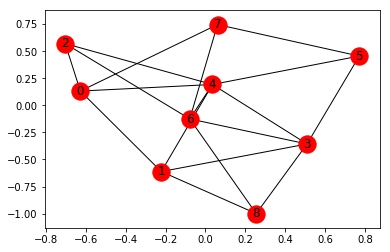

In [25]:
G = nx.fast_gnp_random_graph(9, 0.5)
graph = nx.to_numpy_array(G)
nx.draw_networkx(G)

In [26]:
adj = nx.adjacency_matrix(G)

In [27]:
nx.from_numpy_matrix(graph)

In [120]:
one_day_time_series = dd[:, 23, :]

In [55]:
pos=nx.get_node_attributes(G,'pos')

In [56]:
pos

{}

In [48]:
for (u, v, w) in G.edges(data=True):
    w['weight'] = random.randint(0,10)

In [39]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 4), (0, 7), (1, 3), (1, 4), (1, 8), (2, 4), (2, 6), (3, 4), (3, 5), (3, 6), (3, 8), (4, 5), (4, 6), (5, 7), (6, 7), (6, 8)])

In [121]:
put_weights_measure(nx.to_numpy_array(G), one_day_time_series)

array([[0.        , 0.50027392, 2.39581427, 0.        , 1.87987021,
        0.        , 0.        , 0.        , 0.        ],
       [0.50027392, 0.        , 0.        , 0.41566453, 1.09158646,
        0.        , 0.        , 0.        , 1.64828578],
       [2.39581427, 0.        , 0.        , 0.        , 0.81516379,
        0.        , 1.2098909 , 0.        , 0.        ],
       [0.        , 0.41566453, 0.        , 0.        , 1.21889622,
        1.22978779, 0.35899721, 0.        , 1.43644805],
       [1.87987021, 1.09158646, 0.81516379, 1.21889622, 0.        ,
        0.19967724, 0.84416645, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.22978779, 0.19967724,
        0.        , 0.        , 0.37625656, 0.        ],
       [0.        , 0.        , 1.2098909 , 0.35899721, 0.84416645,
        0.        , 0.        , 0.5688295 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.37625656, 0.5688295 , 0.        , 0.        ],


In [126]:
clustering = SpectralClustering(n_clusters=2,
        random_state=0, affinity='precomputed').fit(adj)

In [127]:
clustering.labels_

array([1, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int32)

In [193]:
def make_consensus_matrix(clustering_matrix):
    M = np.zeros([clustering_matrix.shape[1], clustering_matrix.shape[1]])
    for i in range(clustering_matrix.shape[1]):
        for j in range(clustering_matrix.shape[1]):
            i_j = 0
            for k in range(clustering_matrix.shape[0]):
                if clustering_matrix[k,i] == clustering_matrix[k, j]:
                    i_j+=1
                else:
                    pass
            M[i, j] = i_j / clustering_matrix.shape[0]
    return M

In [194]:
def time_clustering(time_series):
    kmeans = KMeans(n_clusters=3, random_state=0).fit(time_series)
    labels = kmeans.labels_
    return labels

In [215]:
def consensus(graph, time_series, n_clusters, method=0):
    n_days = time_series.shape[1]
    n_nodes = graph.shape[0]
    clustering_matrix = np.array([])
    
    for day in range(n_days):
#         time_labels = time_clustering(time_series[:,day,:])
#         print(time_labels)
        if method == 0:
            time_labels = time_clustering(time_series[:,day,:])
            day_graph = put_weights(time_labels, graph)
        else:
            day_graph = put_weights_measure(graph, time_series[:,day,:], method=0)
        
#         laplacian = csgraph.laplacian(day_graph)
        graph_clustering = SpectralClustering(n_clusters=n_clusters,
            random_state=0, affinity='precomputed').fit(day_graph)
        
        labels = graph_clustering.labels_
#         print(labels)
        clustering_matrix =  np.append(clustering_matrix, labels)
    
    clustering_matrix = clustering_matrix.reshape(n_days, n_nodes)
#     clustering_matrix = clustering_matrix.reshape(n_nodes, n_days)
#     print(n_days, "dff", n_nodes)
#     print(clustering_matrix)
    clustering_matrix.resize(n_days, n_nodes)
    
    consensus_matrix = make_consensus_matrix(clustering_matrix)
    
    return consensus_matrix

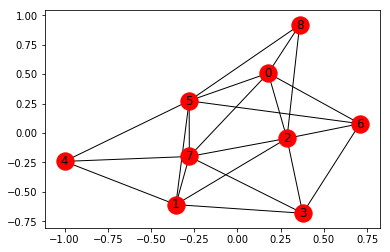

In [16]:
G = nx.fast_gnp_random_graph(9, 0.5)
graph = nx.to_numpy_array(G)
nx.draw_networkx(G)

In [17]:
graph.shape

(9, 9)

In [6]:
data1 = pd.read_csv("ninja_wind_10.1419_31.9922_uncorrected.csv", names=["time", "local_time", "kW", "m/s"])
data2 = pd.read_csv("ninja_wind_28.6135_28.2129_corrected.csv", names=["time", "local_time", "kW"])
data3 = pd.read_csv("ninja_wind_32.1012_-6.6797_corrected.csv", names=["time", "local_time", "kW"])
data4 = pd.read_csv("ninja_wind_38.5004_-8.6229_corrected.csv", names=["time", "local_time", "kW"])
data5 = pd.read_csv("ninja_wind_41.3639_-8.3372_corrected.csv", names=["time", "local_time", "kW"])
data6 = pd.read_csv("ninja_wind_45.9511_4.1309_corrected.csv", names=["time", "local_time", "kW"])
data7 = pd.read_csv("ninja_wind_50.6251_2.8125_corrected.csv", names=["time", "local_time", "kW"])
data8 = pd.read_csv("ninja_wind_52.1605_5.0977_corrected.csv", names=["time", "local_time", "kW"])
data9 = pd.read_csv("ninja_wind_55.1286_9.5801_corrected.csv", names=["time", "local_time", "kW"])
data10 = pd.read_csv("ninja_wind_56.8490_94.7461_uncorrected.csv", names=["time", "local_time", "kW", "m/s"])
data11 = pd.read_csv("ninja_wind_7.3625_-11.7773_uncorrected.csv", names=["time", "local_time", "kW", "m/s"])

In [7]:
data_frames = [data1, data2, data3, data4, data5, data6, data7, data8, data9]

In [8]:
def prepare_data(data):
    data = data[3:8763][["local_time", "kW"]].reset_index(drop=True)
    data.kW = data.kW.apply(lambda x: float(x))
    x = np.array(data.kW).reshape(365, 24)
    return x

In [9]:
for i in range(len(data_frames)):
    data_frames[i] = prepare_data(data_frames[i])
#     print(data_frames[i].shape)

In [10]:
dd = np.array(data_frames)

In [25]:
cons = consensus(graph, dd[:, :20, :], 3)

/Users/daniilvankov/anaconda3/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Users/daniilvankov/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/daniilvankov/anaconda3/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Users/daniilvankov/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embe

[0 0 1 0 2 0 1 0 0]
[1 0 1 1 2 2 0 0 0]
[1 1 1 1 2 1 0 1 1]
[1 2 0 0 0 0 2 0 0]
[0 1 1 1 2 1 1 0 1]
[2 0 0 1 0 1 0 1 0]
[1 2 0 0 2 2 1 1 1]
[1 1 1 1 1 0 2 1 2]
[2 0 2 0 0 1 1 2 1]


/Users/daniilvankov/anaconda3/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Users/daniilvankov/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/daniilvankov/anaconda3/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Users/daniilvankov/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embe

[2 0 2 1 0 2 0 0 0]
[1 0 1 0 1 1 2 1 1]
[2 1 1 1 0 0 1 1 1]
[1 2 0 0 1 0 2 1 0]
[2 2 1 0 1 1 1 2 1]
[2 2 0 0 0 0 1 0 0]
[1 0 2 1 2 0 0 0 2]
[2 0 0 1 1 0 0 0 1]
[1 1 2 0 1 1 0 1 1]
[2 1 2 0 2 1 0 1 2]
[0 1 0 2 0 0 1 0 1]


/Users/daniilvankov/anaconda3/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Users/daniilvankov/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/daniilvankov/anaconda3/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Users/daniilvankov/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embe

In [28]:
cons

array([[1.  , 0.3 , 0.4 , 0.25, 0.3 , 0.3 , 0.05, 0.55, 0.3 ],
       [0.3 , 1.  , 0.3 , 0.35, 0.3 , 0.4 , 0.5 , 0.55, 0.45],
       [0.4 , 0.3 , 1.  , 0.45, 0.45, 0.5 , 0.3 , 0.45, 0.55],
       [0.25, 0.35, 0.45, 1.  , 0.25, 0.35, 0.2 , 0.35, 0.4 ],
       [0.3 , 0.3 , 0.45, 0.25, 1.  , 0.45, 0.15, 0.4 , 0.5 ],
       [0.3 , 0.4 , 0.5 , 0.35, 0.45, 1.  , 0.25, 0.55, 0.5 ],
       [0.05, 0.5 , 0.3 , 0.2 , 0.15, 0.25, 1.  , 0.3 , 0.5 ],
       [0.55, 0.55, 0.45, 0.35, 0.4 , 0.55, 0.3 , 1.  , 0.5 ],
       [0.3 , 0.45, 0.55, 0.4 , 0.5 , 0.5 , 0.5 , 0.5 , 1.  ]])

In [29]:
cons>0.35

array([[ True, False,  True, False, False, False, False,  True, False],
       [False,  True, False, False, False,  True,  True,  True,  True],
       [ True, False,  True,  True,  True,  True, False,  True,  True],
       [False, False,  True,  True, False, False, False, False,  True],
       [False, False,  True, False,  True,  True, False,  True,  True],
       [False,  True,  True, False,  True,  True, False,  True,  True],
       [False,  True, False, False, False, False,  True, False,  True],
       [ True,  True,  True, False,  True,  True, False,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True]])

In [30]:
day363 = dd[:, 363, :]

In [11]:
dd[8,:,:].shape

(365, 24)

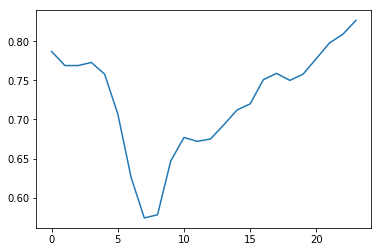

In [43]:
plt.plot(dd[8,25, :])
plt.show()

In [17]:
ee = dd[:,22,:]

In [23]:
DTWDistance(ee[1], ee[2])

2.1350798579912653

In [44]:
day1 = dd[8,25, :]
day2 = dd[7, 25, :]

In [58]:
day3 = dd[6, 22, :]

In [4]:
def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

In [52]:
def euclid_dist(t1,t2):
    return np.sqrt(sum((t1-t2)**2))

In [61]:
euclid_dist(day1, day2)

1.006553028906078

### Experiments

In [133]:
new_graph = nx.Graph()
new_graph.add_edge(0, 1, weight=1)
new_graph.add_edge(0, 2, weight=1)
new_graph.add_edge(1, 2, weight=1)

new_graph.add_edge(3, 4, weight=1)
new_graph.add_edge(3, 5, weight=1)
new_graph.add_edge(4, 5, weight=1)
new_graph.add_edge(2, 4, weight=1)

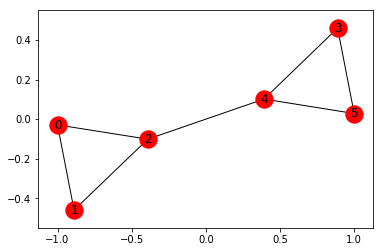

In [134]:
nx.draw_networkx(new_graph)

In [135]:
nx.to_numpy_array(new_graph)

array([[0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 1., 1., 0., 1.],
       [0., 0., 0., 1., 1., 0.]])

In [136]:
cl = SpectralClustering(n_clusters=2,
        random_state=0, affinity='precomputed').fit(nx.to_numpy_array(new_graph))

In [137]:
cl.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

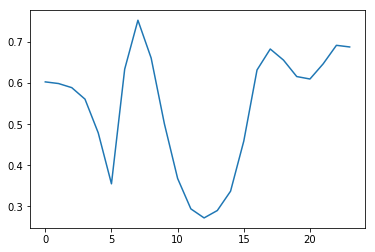

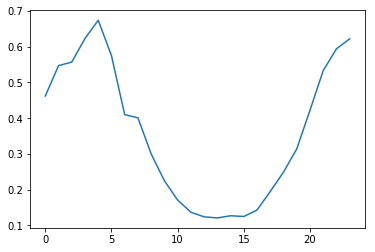

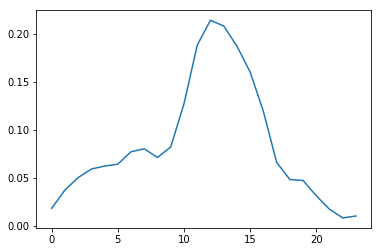

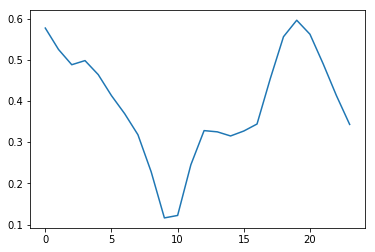

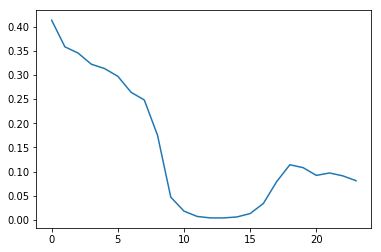

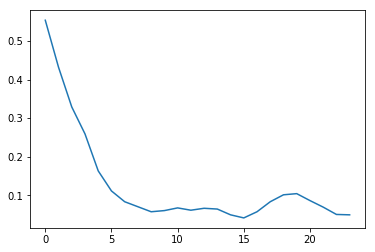

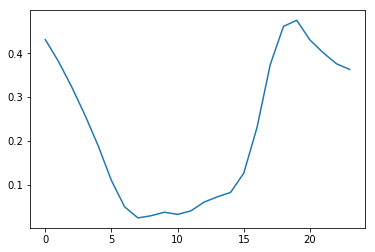

In [132]:
for gr in dd[:7,23,:]:
    plt.plot(gr)
    plt.show()

In [175]:
adj = nx.to_numpy_array(new_graph)
weighted = put_weights_measure(adj, dd[:,90,:])

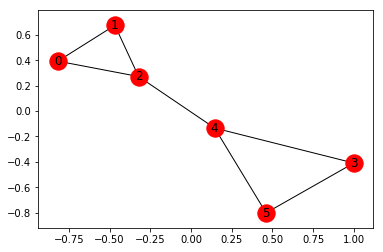

In [176]:
weighted_g = nx.from_numpy_array(adj)
nx.draw_networkx(weighted_g)

In [177]:
cl = SpectralClustering(n_clusters=2,
        random_state=0, affinity='precomputed').fit(nx.to_numpy_array(weighted_g))
cl.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [179]:
new_graph = nx.Graph()
new_graph.add_edge(0, 1, weight=1)
new_graph.add_edge(0, 2, weight=1)
new_graph.add_edge(1, 2, weight=1)

new_graph.add_edge(3, 4, weight=1)
new_graph.add_edge(3, 5, weight=1)
new_graph.add_edge(4, 5, weight=1)

new_graph.add_edge(2, 4, weight=1)
new_graph.add_edge(1, 5, weight=1)

### Example where labels not equal to [1,1,1,0,0,0]

[0 0 0 1 0 1]


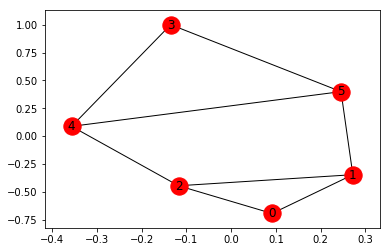

In [189]:
adj = nx.to_numpy_array(new_graph)
weighted = put_weights_measure(adj, dd[:,7,:])
cl = SpectralClustering(n_clusters=2,
        random_state=0, affinity='precomputed').fit(nx.to_numpy_array(weighted_g))
print(cl.labels_)
weighted_g = nx.from_numpy_array(adj)
nx.draw_networkx(weighted_g)

In [196]:
consensus(adj, dd[:,:100,:], 2, method=1)

array([[1.  , 1.  , 0.99, 0.  , 0.11, 0.  ],
       [1.  , 1.  , 0.99, 0.  , 0.11, 0.  ],
       [0.99, 0.99, 1.  , 0.01, 0.12, 0.01],
       [0.  , 0.  , 0.01, 1.  , 0.89, 1.  ],
       [0.11, 0.11, 0.12, 0.89, 1.  , 0.89],
       [0.  , 0.  , 0.01, 1.  , 0.89, 1.  ]])

### Random graph clustering with 3 cluster

array([[1.  , 1.  , 0.01, 0.01, 1.  , 0.8 , 0.41, 0.63, 0.63],
       [1.  , 1.  , 0.01, 0.01, 1.  , 0.8 , 0.41, 0.63, 0.63],
       [0.01, 0.01, 1.  , 1.  , 0.01, 0.19, 0.58, 0.38, 0.38],
       [0.01, 0.01, 1.  , 1.  , 0.01, 0.19, 0.58, 0.38, 0.38],
       [1.  , 1.  , 0.01, 0.01, 1.  , 0.8 , 0.41, 0.63, 0.63],
       [0.8 , 0.8 , 0.19, 0.19, 0.8 , 1.  , 0.61, 0.61, 0.59],
       [0.41, 0.41, 0.58, 0.58, 0.41, 0.61, 1.  , 0.72, 0.68],
       [0.63, 0.63, 0.38, 0.38, 0.63, 0.61, 0.72, 1.  , 0.96],
       [0.63, 0.63, 0.38, 0.38, 0.63, 0.59, 0.68, 0.96, 1.  ]])

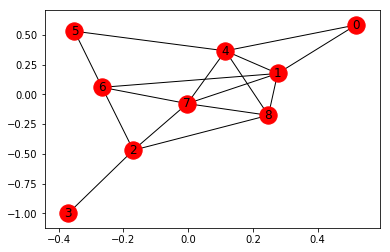

In [197]:
G = nx.fast_gnp_random_graph(9, 0.5)
graph = nx.to_numpy_array(G)
nx.draw_networkx(G)
adj = nx.to_numpy_array(G)
consensus(adj, dd[:,:100,:], 2, method=1)

We can see that nodes 0,4,5 prety close to be in one cluster and (3 and 2). 7, 8 will be at (3, 2) cluster. And 6 probably will be at cluster (2,3,7,8)

array([[1.  , 0.25, 0.7 , 0.23, 0.87, 0.03, 0.66, 0.64, 0.02],
       [0.25, 1.  , 0.09, 0.81, 0.12, 0.02, 0.1 , 0.37, 0.08],
       [0.7 , 0.09, 1.  , 0.  , 0.83, 0.03, 0.84, 0.72, 0.  ],
       [0.23, 0.81, 0.  , 1.  , 0.12, 0.1 , 0.02, 0.19, 0.23],
       [0.87, 0.12, 0.83, 0.12, 1.  , 0.02, 0.67, 0.59, 0.  ],
       [0.03, 0.02, 0.03, 0.1 , 0.02, 1.  , 0.16, 0.02, 0.87],
       [0.66, 0.1 , 0.84, 0.02, 0.67, 0.16, 1.  , 0.66, 0.03],
       [0.64, 0.37, 0.72, 0.19, 0.59, 0.02, 0.66, 1.  , 0.01],
       [0.02, 0.08, 0.  , 0.23, 0.  , 0.87, 0.03, 0.01, 1.  ]])

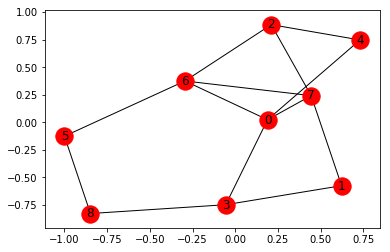

In [198]:
G = nx.fast_gnp_random_graph(9, 0.5)
graph = nx.to_numpy_array(G)
nx.draw_networkx(G)
adj = nx.to_numpy_array(G)
consensus(adj, dd[:,:100,:], 3, method=1)

array([[1.  , 0.  , 0.  , 0.46, 0.55, 0.32, 0.74, 0.14, 0.3 ],
       [0.  , 1.  , 0.88, 0.08, 0.03, 0.34, 0.  , 0.52, 0.47],
       [0.  , 0.88, 1.  , 0.  , 0.  , 0.38, 0.  , 0.6 , 0.54],
       [0.46, 0.08, 0.  , 1.  , 0.01, 0.04, 0.36, 0.39, 0.41],
       [0.55, 0.03, 0.  , 0.01, 1.  , 0.59, 0.65, 0.  , 0.05],
       [0.32, 0.34, 0.38, 0.04, 0.59, 1.  , 0.34, 0.27, 0.27],
       [0.74, 0.  , 0.  , 0.36, 0.65, 0.34, 1.  , 0.08, 0.27],
       [0.14, 0.52, 0.6 , 0.39, 0.  , 0.27, 0.08, 1.  , 0.47],
       [0.3 , 0.47, 0.54, 0.41, 0.05, 0.27, 0.27, 0.47, 1.  ]])

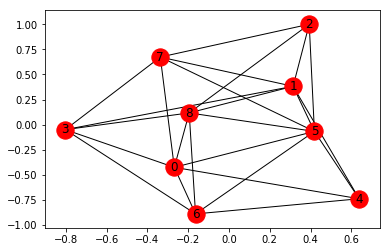

In [199]:
G = nx.fast_gnp_random_graph(9, 0.5)
graph = nx.to_numpy_array(G)
nx.draw_networkx(G)
adj = nx.to_numpy_array(G)
consensus(adj, dd[:,:100,:], 3, method=1)

array([[1.  , 0.12, 0.49, 0.03, 0.03, 0.43, 0.58, 0.61, 0.02],
       [0.12, 1.  , 0.2 , 0.54, 0.58, 0.04, 0.39, 0.42, 0.19],
       [0.49, 0.2 , 1.  , 0.2 , 0.13, 0.67, 0.21, 0.17, 0.09],
       [0.03, 0.54, 0.2 , 1.  , 0.62, 0.1 , 0.12, 0.1 , 0.55],
       [0.03, 0.58, 0.13, 0.62, 1.  , 0.09, 0.17, 0.13, 0.55],
       [0.43, 0.04, 0.67, 0.1 , 0.09, 1.  , 0.12, 0.06, 0.36],
       [0.58, 0.39, 0.21, 0.12, 0.17, 0.12, 1.  , 0.93, 0.01],
       [0.61, 0.42, 0.17, 0.1 , 0.13, 0.06, 0.93, 1.  , 0.  ],
       [0.02, 0.19, 0.09, 0.55, 0.55, 0.36, 0.01, 0.  , 1.  ]])

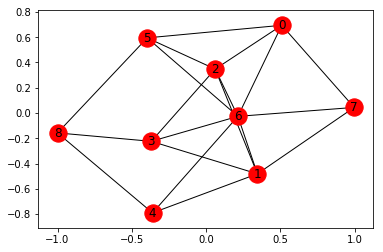

In [216]:
G = nx.fast_gnp_random_graph(9, 0.5)
graph = nx.to_numpy_array(G)
nx.draw_networkx(G)
adj = nx.to_numpy_array(G)
consensus(adj, dd[:,:100,:], 3, method=1)